In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import entropy as en
import skimage
from skimage.color import rgb2hed, hed2rgb, rgb2gray
from skimage.io import imread
from skimage import feature, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Normalizer

In [4]:
X = np.load("images.npy")#read images
Y = pd.read_csv('counts.csv')#read cell counts
F = np.loadtxt('split.txt')#read fold information

In [5]:
#i
a=np.sum(np.array(F) > 2, axis=0)
b=np.sum(np.array(F) < 2, axis=0)
c = (4981-a-b)
print('First Fold:', b,'Second Fold:', c,'Third Fold:', a)
#There are 4981 examples in total

First Fold: 1622 Second Fold: 1751 Third Fold: 1608


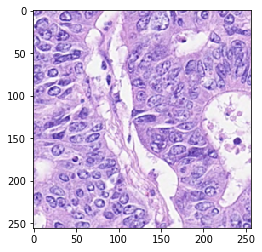

In [6]:
plt.imshow(X[0])
plt.show()

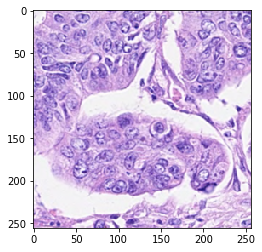

In [5]:
plt.imshow(X[1])
plt.show()

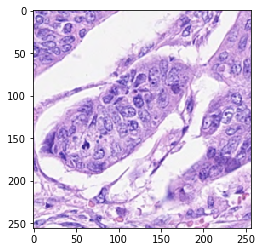

In [6]:
plt.imshow(X[3])
plt.show()

In [46]:
Y.insert(6,"Fold",F)

In [51]:
Fold1

,neutrophil,epithelial,lymphocyte,plasma,eosinophil,connective,Fold
136,0,54,4,7,0,12,1.0
137,0,95,2,4,0,5,1.0
138,0,101,14,13,3,25,1.0
139,0,14,7,3,1,34,1.0
140,0,0,0,0,0,2,1.0
...,...,...,...,...,...,...,...
4840,1,83,23,16,0,13,1.0
4841,0,53,29,28,4,31,1.0
4842,0,6,17,7,2,56,1.0
4843,0,53,28,23,3,33,1.0


In [48]:
#MCC stands for Max Cell COUNT
Fold1 = Y[Y["Fold"] == 1.0]
a1=Fold1["neutrophil"].max()
b1=Fold1["epithelial"].max()
c1=Fold1["lymphocyte"].max() 
d1=Fold1["plasma"].max()
e1=Fold1["eosinophil"].max()
f1=Fold1["connective"].max()
print('neutrophil MCC:', a1,'epithelial MCC:', b1,'lymphocyte MCC:', c1,'plasma MCC:', d1,'eosinophil MCC:', e1,'connective MCC:', f1)

neutrophil MCC: 50 epithelial MCC: 253 lymphocyte MCC: 264 plasma MCC: 62 eosinophil MCC: 19 connective MCC: 104


In [49]:
Fold2 = Y[Y["Fold"] == 2.0]
a2=Fold2["neutrophil"].max()
b2=Fold2["epithelial"].max()
c2=Fold2["lymphocyte"].max()
d2=Fold2["plasma"].max()
e2=Fold2["eosinophil"].max()
f2=Fold2["connective"].max()
print('neutrophil MCC:', a2,'epithelial MCC:', b2,'lymphocyte MCC:', c2,'plasma MCC:', d2,'eosinophil MCC:', e2,'connective MCC:', f1)


neutrophil MCC: 48 epithelial MCC: 169 lymphocyte MCC: 450 plasma MCC: 66 eosinophil MCC: 25 connective MCC: 104


In [50]:
Fold3 = Y[Y["Fold"] == 3.0]
a3=Fold3["neutrophil"].max()
b3=Fold3["epithelial"].max()
c3=Fold3["lymphocyte"].max()
d3=Fold3["plasma"].max()
e3=Fold3["eosinophil"].max()
f3=Fold3["connective"].max()
print('neutrophil MCC:', a3,'epithelial MCC:', b3,'lymphocyte MCC:', c3,'plasma MCC:', d3,'eosinophil MCC:', e3,'connective MCC:', f3)


neutrophil MCC: 18 epithelial MCC: 181 lymphocyte MCC: 293 plasma MCC: 90 eosinophil MCC: 16 connective MCC: 99


<function matplotlib.pyplot.show(*args, **kw)>

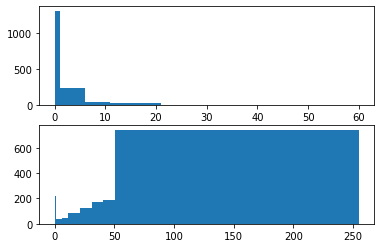

In [548]:
fig, (ax1, ax2) = plt.subplots(2)
(n, bins, patches) = ax1.hist(Fold1["neutrophil"],[0,1,6,11,21,31,41,51,60])
(n1, bins, patches) = ax2.hist(Fold1["epithelial"],[0,1,6,11,21,31,41,51,255])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

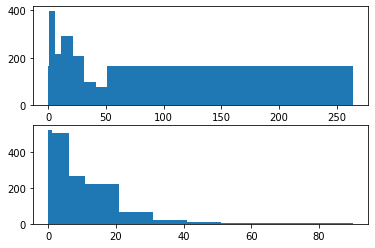

In [549]:
fig, (ax1, ax2) = plt.subplots(2)
(n2, bins, patches) = ax1.hist(Fold1["lymphocyte"],[0,1,6,11,21,31,41,51,264])
(n3, bins, patches) = ax2.hist(Fold1["plasma"],[0,1,6,11,21,31,41,51,90])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

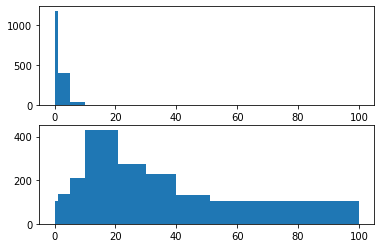

In [550]:
fig, (ax1, ax2) = plt.subplots(2)
(n4, bins, patches) = ax1.hist(Fold1["eosinophil"],[0,1,5,10,21,30,40,51,100])
(n5, bins, patches) = ax2.hist(Fold1["connective"],[0,1,5,10,21,30,40,51,100])
plt.show

In [551]:
# Fold 1 Histogram bin counts
data = {"neutrophil": n, "epithelial": n1, "lymphocyte": n2,"plasma": n3, "eosinophil": n4,"connective": n5,}        
df = pd.DataFrame(data, index=['0', '1-5', '6-10','11-20', '21-30', '31-40','41-50', '>50'])
df


,neutrophil,epithelial,lymphocyte,plasma,eosinophil,connective
0,1308.0,223.0,166.0,527.0,1179.0,105.0
1-5,235.0,35.0,397.0,508.0,408.0,139.0
6-10,40.0,46.0,216.0,267.0,34.0,209.0
11-20,28.0,82.0,293.0,222.0,1.0,432.0
21-30,7.0,127.0,209.0,64.0,0.0,273.0
31-40,3.0,176.0,99.0,22.0,0.0,230.0
41-50,1.0,190.0,75.0,8.0,0.0,130.0
>50,0.0,743.0,167.0,4.0,0.0,103.0


<function matplotlib.pyplot.show(*args, **kw)>

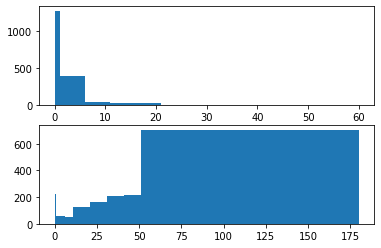

In [553]:
#Fold2
fig, (ax1, ax2) = plt.subplots(2)
(n20, bins, patches) = ax1.hist(Fold2["neutrophil"],[0,1,6,11,21,31,41,51,60])
(n21, bins, patches) = ax2.hist(Fold2["epithelial"],[0,1,6,11,21,31,41,51,180])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

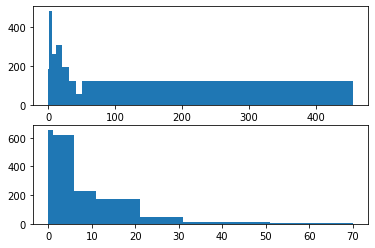

In [554]:
fig, (ax1, ax2) = plt.subplots(2)
(n22, bins, patches) = ax1.hist(Fold2["lymphocyte"],[0,1,6,11,21,31,41,51,455])
(n23, bins, patches) = ax2.hist(Fold2["plasma"],[0,1,6,11,21,31,41,51,70])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

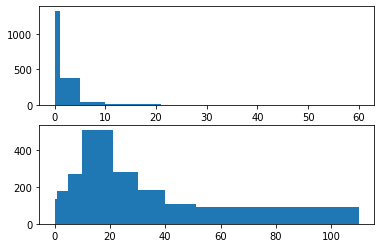

In [555]:
fig, (ax1, ax2) = plt.subplots(2)
(n24, bins, patches) = ax1.hist(Fold2["eosinophil"],[0,1,5,10,21,30,40,51,60])
(n25, bins, patches) = ax2.hist(Fold2["connective"],[0,1,5,10,21,30,40,51,110])
plt.show

In [556]:
# Fold 2 Histogram bin counts
data1 = {"neutrophil": n20, "epithelial": n21, "lymphocyte": n22,"plasma": n23, "eosinophil": n24,"connective": n25,}        
df1 = pd.DataFrame(data, index=['0', '1-5', '6-10','11-20', '21-30', '31-40','41-50', '>50'])
df1

,neutrophil,epithelial,lymphocyte,plasma,eosinophil,connective
0,1271.0,221.0,185.0,657.0,1316.0,135.0
1-5,398.0,62.0,484.0,623.0,380.0,178.0
6-10,48.0,49.0,265.0,228.0,44.0,269.0
11-20,28.0,125.0,310.0,171.0,10.0,508.0
21-30,3.0,164.0,198.0,44.0,1.0,280.0
31-40,0.0,210.0,126.0,14.0,0.0,182.0
41-50,3.0,215.0,59.0,10.0,0.0,106.0
>50,0.0,705.0,124.0,4.0,0.0,93.0


In [557]:
print('neutrophil MCC:', a3,'epithelial MCC:', b3,'lymphocyte MCC:', c3,'plasma MCC:', d3,'eosinophil MCC:', e3,'connective MCC:', f3)

neutrophil MCC: 18 epithelial MCC: 181 lymphocyte MCC: 293 plasma MCC: 90 eosinophil MCC: 16 connective MCC: 99


<function matplotlib.pyplot.show(*args, **kw)>

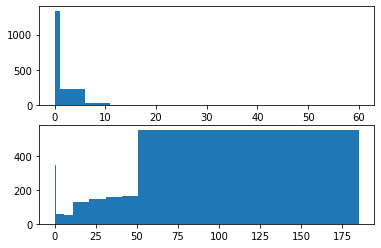

In [559]:
#Fold 3
fig, (ax1, ax2) = plt.subplots(2)
(n30, bins, patches) = ax1.hist(Fold3["neutrophil"],[0,1,6,11,21,31,41,51,60])
(n31, bins, patches) = ax2.hist(Fold3["epithelial"],[0,1,6,11,21,31,41,51,185])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

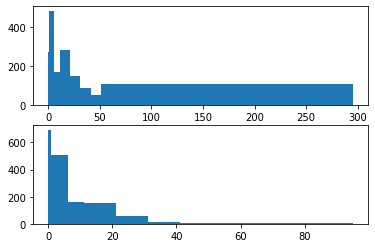

In [560]:
fig, (ax1, ax2) = plt.subplots(2)
(n32, bins, patches) = ax1.hist(Fold3["lymphocyte"],[0,1,6,11,21,31,41,51,295])
(n33, bins, patches) = ax2.hist(Fold3["plasma"],[0,1,6,11,21,31,41,51,95])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

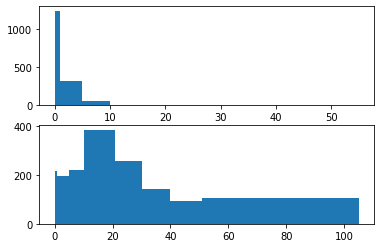

In [561]:
fig, (ax1, ax2) = plt.subplots(2)
(n34, bins, patches) = ax1.hist(Fold3["eosinophil"],[0,1,5,10,21,30,40,51,55])
(n35, bins, patches) = ax2.hist(Fold3["connective"],[0,1,5,10,21,30,40,51,105])
plt.show

In [562]:
# Fold 3 Histogram bin counts
data2 = {"neutrophil": n30, "epithelial": n31, "lymphocyte": n32,"plasma": n33, "eosinophil": n34,"connective": n35,}        
df2 = pd.DataFrame(data, index=['0', '1-5', '6-10','11-20', '21-30', '31-40','41-50', '>50'])
df2

,neutrophil,epithelial,lymphocyte,plasma,eosinophil,connective
0,1271.0,221.0,185.0,657.0,1316.0,135.0
1-5,398.0,62.0,484.0,623.0,380.0,178.0
6-10,48.0,49.0,265.0,228.0,44.0,269.0
11-20,28.0,125.0,310.0,171.0,10.0,508.0
21-30,3.0,164.0,198.0,44.0,1.0,280.0
31-40,0.0,210.0,126.0,14.0,0.0,182.0
41-50,3.0,215.0,59.0,10.0,0.0,106.0
>50,0.0,705.0,124.0,4.0,0.0,93.0


skimage version 0.16.2


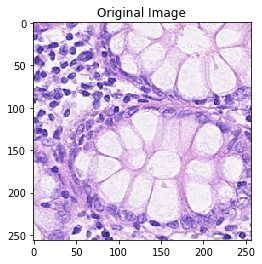

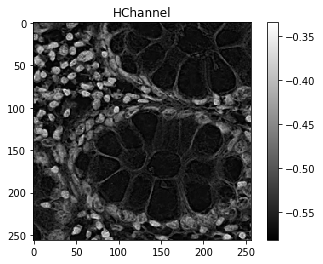

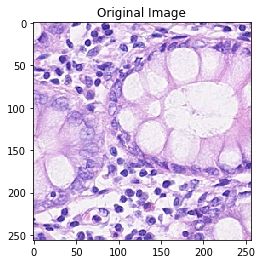

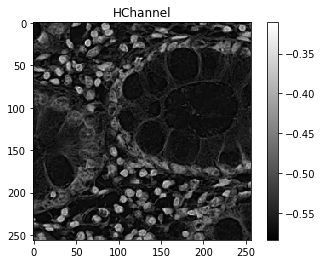

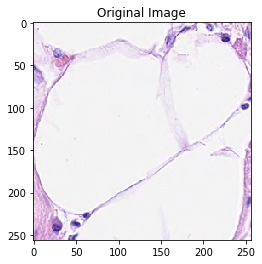

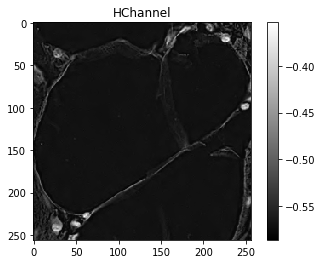

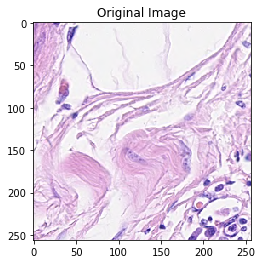

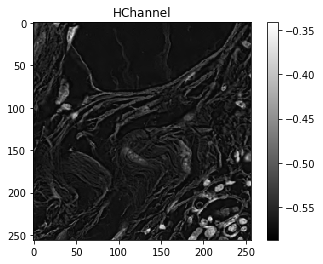

In [507]:
print('skimage version',skimage.__version__)
for i in range(10,14): #for images 10 - 14 plot original and H channel 
    I = X[i]/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I)#convert to HED
    plt.imshow(I);plt.title('Original Image');plt.show()
    I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('HChannel');plt.show()

In [19]:
s = []
for i in range(len(X)):
    L = X[i]/255.0 
    I_hed1 = rgb2hed(L)
    h = (np.average(I_hed1[:,:,0]))
    y = s.append(h)
a = s
print(a)
    

[-0.5284072935694035, -0.5327229348654099, -0.5279951364362346, -0.5361710494770942, -0.5205824130815598, -0.5205659894590451, -0.5259062874698789, -0.5270124428879663, -0.5371419151577855, -0.5381743045557683, -0.5387833158213228, -0.5389058539598452, -0.5647248496778274, -0.5577697303835865, -0.5528640405418641, -0.5550443347857645, -0.5347035846839607, -0.5336302918759773, -0.5361861921622117, -0.529339096215264, -0.5398920594732344, -0.5386633004652266, -0.5414538021487543, -0.5388284584523467, -0.5553051303244194, -0.5543977192455816, -0.5540571448767115, -0.5550745687715225, -0.5550205164954067, -0.5568073153437726, -0.5581866515403395, -0.5581012130213358, -0.5559711031070997, -0.5426052630705712, -0.550714713354336, -0.5394382223155623, -0.5577548479745349, -0.5589645159076144, -0.5542180292217137, -0.5463027248158124, -0.564549499134346, -0.5662528694451302, -0.5645641616899107, -0.5658412467180489, -0.5408722397371873, -0.5425807151916088, -0.538237323514043, -0.5409193622915

In [20]:
np.average(I_hed[:,:,0])

-0.5327229348654099

In [21]:
Y.insert(7, "AVG_HR", a)

In [22]:
Fold1IV = Y[Y["Fold"] == 1.0]
Fold1IV

,neutrophil,epithelial,lymphocyte,plasma,eosinophil,connective,Fold,AVG_HR
136,0,54,4,7,0,12,1.0,-0.550203
137,0,95,2,4,0,5,1.0,-0.544604
138,0,101,14,13,3,25,1.0,-0.538365
139,0,14,7,3,1,34,1.0,-0.556148
140,0,0,0,0,0,2,1.0,-0.566630
...,...,...,...,...,...,...,...,...
4840,1,83,23,16,0,13,1.0,-0.538829
4841,0,53,29,28,4,31,1.0,-0.539383
4842,0,6,17,7,2,56,1.0,-0.558033
4843,0,53,28,23,3,33,1.0,-0.539915


<function matplotlib.pyplot.show(*args, **kw)>

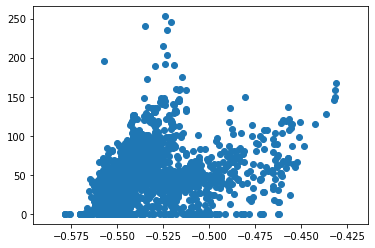

In [23]:
plt.scatter(Fold1IV["AVG_HR"],Fold1IV["epithelial"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

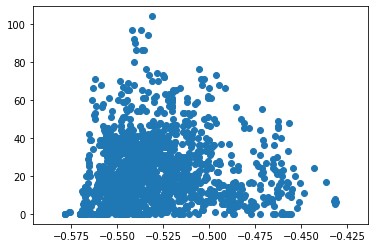

In [24]:
plt.scatter(Fold1IV["AVG_HR"],Fold1IV["connective"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

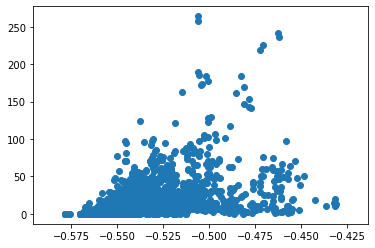

In [25]:
plt.scatter(Fold1IV["AVG_HR"],Fold1IV["lymphocyte"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

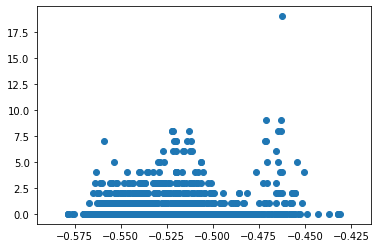

In [26]:
plt.scatter(Fold1IV["AVG_HR"],Fold1IV["eosinophil"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

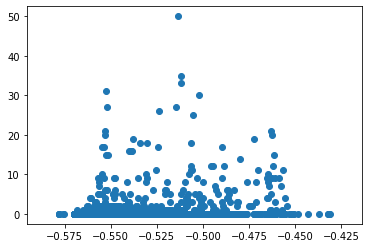

In [27]:
plt.scatter(Fold1IV["AVG_HR"],Fold1IV["neutrophil"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

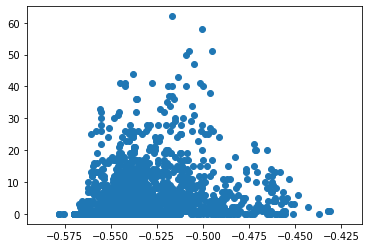

In [28]:
plt.scatter(Fold1IV["AVG_HR"],Fold1IV["plasma"])
plt.show

In [58]:
#Q2ai)
j = []
k = []
l = []
m = []
n = []
o = []
p = []
r = []
s = []
for i in range(len(X)):   
    a = X[i]/255.0 
    I_hed1 = rgb2hed(a)
    b = (I_hed1[:,:,0])
    c1 = b.flatten()
    c2 = a.flatten()
    d = np.array(np.concatenate((c1,c2),axis=0))
    e = np.average(d)
    f = np.var(d)
    value,counts = np.unique(d, return_counts=True)
    h = en(counts)
    q = rgb2gray(X[i])
    g = greycomatrix(q.astype(int), distances=[5], angles=[0], levels=256,symmetric=True, normed=True)
    contrast = greycoprops(g, 'correlation')
    contrast1 = greycoprops(g, 'contrast')
    contrast2 = greycoprops(g, 'dissimilarity')
    contrast3 = greycoprops(g, 'homogeneity')
    contrast4 = greycoprops(g, 'ASM')
    contrast5 = greycoprops(g, 'energy')
    j.append(e)
    k.append(f)
    l.append(h)
    m.append(contrast)
    n.append(contrast1)
    o.append(contrast2)
    p.append(contrast3)
    r.append(contrast4)
    s.append(contrast5)



0.2662802532863169

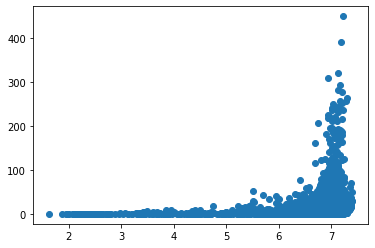

In [14]:
plt.scatter(l,Y["lymphocyte"])
plt.show
stats.pearsonr(l,Y["lymphocyte"])[0] 

-0.3841778086024593

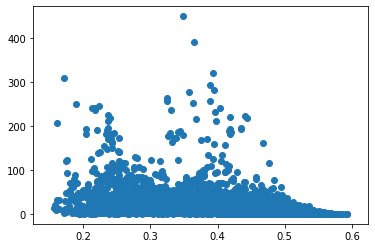

In [15]:
plt.scatter(j,Y["lymphocyte"])
plt.show
stats.pearsonr(j,Y["lymphocyte"])[0] 

-0.37113150154350905

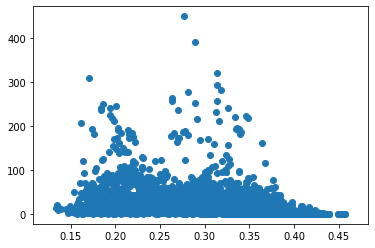

In [16]:
plt.scatter(k,Y["lymphocyte"])
plt.show
stats.pearsonr(k,Y["lymphocyte"])[0] 

In [356]:
q = rgb2gray(I_hed[:,:,0])
g = greycomatrix(q.astype(int), distances=[1], angles=[0], levels=256,symmetric=True, normed=True)
contrast = greycoprops(g, 'contrast')
print(contrast)

[[0.]]


In [13]:
j = []
k = []
l = []
m = []
n = []
o = []
p = []
r = []
s = []
for i in range(len(X)):   
    a = X[i]/255.0 
    I_hed1 = rgb2hed(a)
    b = (I_hed1[:,:,0])
    c1 = b.flatten()
    c2 = a.flatten()
    d = np.array(np.concatenate((c1,c2),axis=0))
    e = np.average(d)
    f = np.var(d)
    value,counts = np.unique(d, return_counts=True)
    h = en(counts)
    q = rgb2gray(X[i])
    g = greycomatrix(q.astype(int), distances=[1], angles=[0], levels=256,symmetric=True, normed=True)
    contrast = greycoprops(g, 'correlation')
    contrast1 = greycoprops(g, 'contrast')
    contrast2 = greycoprops(g, 'dissimilarity')
    contrast3 = greycoprops(g, 'homogeneity')
    contrast4 = greycoprops(g, 'ASM')
    contrast5 = greycoprops(g, 'energy')
    j.append(e)
    k.append(f)
    l.append(h)
    m.append(contrast)
    n.append(contrast1)
    o.append(contrast2)
    p.append(contrast3)
    r.append(contrast4)
    s.append(contrast5)


In [259]:
print(j)

[0.4445547425543404, 0.45672631033906264, 0.4440531897200237, 0.46460652064715574, 0.4159382285167195, 0.41503648593793474, 0.4333684646578827, 0.43362623773369935, 0.47089411715781926, 0.4726619830867013, 0.4730893099415367, 0.473330207054233, 0.5549319401780081, 0.5149304072382793, 0.49170831524654235, 0.4992283344829401, 0.4613992847802966, 0.46180587953847346, 0.4685522630903448, 0.44871672705199744, 0.45051363279368595, 0.4473377945078126, 0.44914132396782835, 0.44551580432743876, 0.48805847706005634, 0.47153421623735614, 0.4675068020256905, 0.47299603377027816, 0.472899040295381, 0.46966445510439075, 0.44709272645219306, 0.4717614434990319, 0.4990128286866902, 0.47648455267885687, 0.4945545262225375, 0.4671604388202364, 0.45279971047496315, 0.45414775592275947, 0.43915159405601456, 0.43353580668954417, 0.491316079925934, 0.5034108516730695, 0.49834189905458265, 0.5080854102347419, 0.438982723589562, 0.43904414028910765, 0.4254424164024329, 0.43699244647426194, 0.4637131901240235,

In [260]:
print(h)

[0.334924539284232, 0.34659592951061247, 0.33693783809190153, 0.35466466706786964, 0.3126453477739273, 0.31334599977332817, 0.32673965033599445, 0.32824864562211353, 0.3610957080378825, 0.36096987781833073, 0.3634163156069858, 0.3639589205069656, 0.42318273811057033, 0.3947894551397118, 0.3768155627934236, 0.3828451471046981, 0.34839309738208685, 0.3480071362411766, 0.3547593038663293, 0.3391483409432181, 0.34573874698660406, 0.34201341576305583, 0.3468083981683216, 0.34384347770435575, 0.3787134540494578, 0.36426994530825046, 0.3599995033803639, 0.3652630971281696, 0.36737820095509816, 0.3684089716149902, 0.3566671522502911, 0.3683360565766942, 0.3812737487271872, 0.36788556274675466, 0.37907171225808767, 0.36386846718944904, 0.3579630085876523, 0.35873423667794613, 0.3473891653098313, 0.3454761395142423, 0.37999837427354516, 0.3881853227669568, 0.3845403466832546, 0.3910214630972683, 0.342053266901058, 0.34424199519446513, 0.33148104392976996, 0.34246625032637446, 0.3570442117410858,

In [272]:
print(l)

[6.911122004111368, 6.803582773665507, 6.774522934256633, 6.6885350612984755, 6.988592837814406, 7.017928042905648, 6.945181617371356, 6.9661182691121395, 6.7711625664828325, 6.770287445891302, 6.748119409430419, 6.755324567941299, 4.294776788819771, 6.231116758089648, 6.622238323718296, 6.574548029405216, 6.8359034688200655, 6.82475062204745, 6.78384505668485, 6.923021216681655, 6.828398301098154, 6.892684492595356, 6.921653645133496, 6.9309697170655005, 6.372033782990602, 6.692002572976376, 6.645085664327324, 6.701886840966507, 6.746503931757766, 6.773449014692403, 6.908967002562926, 6.722238332641841, 6.494356569455498, 6.685860805414932, 6.5750649807238934, 6.682754794468867, 6.739374543994674, 6.709465070198396, 6.852449651997128, 6.984167127504486, 6.488416312445443, 6.369956920883245, 6.378224324365734, 6.284894505471778, 6.935804446678676, 6.929500116692054, 7.011360596961973, 6.952439934838639, 6.67659970958511, 6.8693244113684955, 6.904431312354712, 6.835193928225197, 6.13856

In [17]:
print(m)

[array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.09272444]]), array([[-0.00029114]]), array([[-0.00038311]]), array([[-0.00055177]]), array([[0.10674779]]), array([[0.08368202]]), array([[0.06228964]]), array([[0.06047006]]), array([[0.07830297]]), array([[0.11289448]]), array([[0.05359921]]), array([[0.07241699]]), array([[0.10474202]]), array([[0.17561185]]), array([[0.03456264]]), array([[0.16212669]]), array([[-4.59579944e-05]]), array([[-0.00010724]]), array([[-0.00027581]]), array([[-0.00024516]]), array([[0.05697425]]), array([[-0.00022983]]), array([[-0.00010724]]), array([[-0.00015321]]), array([[0.13464466]]), array([[0.06813758]]), array([[0.03926414]]), array([[0.10474202]]), array([[0.11534327]]), array([[0.09708994]]), array([[0.10168733]]), array([[0.10268389]]), array([[0.23927167]]), array([[0.09330554]]), array([[0.19399996]]), array([[0.10599248]]), array([[-0.00026048]]), array([[-0.00036778]]), array([[-0.00027581]]), array([[0.02574867]]), ar

In [18]:
print(n)

[array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.00059743]]), array([[0.00058211]]), array([[0.00076593]]), array([[0.00110294]]), array([[0.00523897]]), array([[0.00424326]]), array([[0.0044424]]), array([[0.00631127]]), array([[0.00248162]]), array([[0.00831801]]), array([[0.00514706]]), array([[0.00528493]]), array([[0.00104167]]), array([[0.00171569]]), array([[0.00166973]]), array([[0.00266544]]), array([[9.19117647e-05]]), array([[0.00021446]]), array([[0.00055147]]), array([[0.0004902]]), array([[0.00199142]]), array([[0.00045956]]), array([[0.00021446]]), array([[0.00030637]]), array([[0.00098039]]), array([[0.00165441]]), array([[0.00147059]]), array([[0.00104167]]), array([[0.00459559]]), array([[0.01734069]]), array([[0.00902267]]), array([[0.02512255]]), array([[0.00145527]]), array([[0.00088848]]), array([[0.00088848]]), array([[0.00229779]]), array([[0.00052083]]), array([[0.00073529]]), array([[0.00055147]]), array([[0.00113358]]), array([[0.0013786

In [19]:
print(o)

[array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.00059743]]), array([[0.00058211]]), array([[0.00076593]]), array([[0.00110294]]), array([[0.00523897]]), array([[0.00424326]]), array([[0.0044424]]), array([[0.00631127]]), array([[0.00248162]]), array([[0.00831801]]), array([[0.00514706]]), array([[0.00528493]]), array([[0.00104167]]), array([[0.00171569]]), array([[0.00166973]]), array([[0.00266544]]), array([[9.19117647e-05]]), array([[0.00021446]]), array([[0.00055147]]), array([[0.0004902]]), array([[0.00199142]]), array([[0.00045956]]), array([[0.00021446]]), array([[0.00030637]]), array([[0.00098039]]), array([[0.00165441]]), array([[0.00147059]]), array([[0.00104167]]), array([[0.00459559]]), array([[0.01734069]]), array([[0.00902267]]), array([[0.02512255]]), array([[0.00145527]]), array([[0.00088848]]), array([[0.00088848]]), array([[0.00229779]]), array([[0.00052083]]), array([[0.00073529]]), array([[0.00055147]]), array([[0.00113358]]), array([[0.0013786

In [20]:
print(p)

[array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.99970129]]), array([[0.99970895]]), array([[0.99961703]]), array([[0.99944853]]), array([[0.99738051]]), array([[0.99787837]]), array([[0.9977788]]), array([[0.99684436]]), array([[0.99875919]]), array([[0.99584099]]), array([[0.99742647]]), array([[0.99735754]]), array([[0.99947917]]), array([[0.99914216]]), array([[0.99916513]]), array([[0.99866728]]), array([[0.99995404]]), array([[0.99989277]]), array([[0.99972426]]), array([[0.9997549]]), array([[0.99900429]]), array([[0.99977022]]), array([[0.99989277]]), array([[0.99984681]]), array([[0.9995098]]), array([[0.99917279]]), array([[0.99926471]]), array([[0.99947917]]), array([[0.99770221]]), array([[0.99132966]]), array([[0.99548866]]), array([[0.98743873]]), array([[0.99927237]]), array([[0.99955576]]), array([[0.99955576]]), array([[0.9988511]]), array([[0.99973958]]), array([[0.99963235]]), array([[0.99972426]]), array([[0.99943321]]), array([[0.99931066]]), 

In [21]:
print(r)

[array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.99874445]]), array([[0.99883629]]), array([[0.99846902]]), array([[0.99779594]]), array([[0.98892342]]), array([[0.99114397]]), array([[0.99083983]]), array([[0.98701108]]), array([[0.9948321]]), array([[0.9823746]]), array([[0.98944087]]), array([[0.98904548]]), array([[0.99779588]]), array([[0.99620609]]), array([[0.99660355]]), array([[0.99416047]]), array([[0.99981619]]), array([[0.99957115]]), array([[0.99889752]]), array([[0.99901997]]), array([[0.99590081]]), array([[0.9990812]]), array([[0.99957115]]), array([[0.9993874]]), array([[0.99788763]]), array([[0.99657294]]), array([[0.99700088]]), array([[0.99779588]]), array([[0.99023076]]), array([[0.96375468]]), array([[0.98101472]]), array([[0.94751116]]), array([[0.99663385]]), array([[0.9981324]]), array([[0.99800998]]), array([[0.99513727]]), array([[0.99895874]]), array([[0.99853022]]), array([[0.99889752]]), array([[0.99770417]]), array([[0.9972149]]), ar

In [22]:
print(s)

[array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.99937203]]), array([[0.99941798]]), array([[0.99923422]]), array([[0.99889736]]), array([[0.99444629]]), array([[0.99556214]]), array([[0.99540938]]), array([[0.99348431]]), array([[0.9974127]]), array([[0.99114812]]), array([[0.99470643]]), array([[0.99450766]]), array([[0.99889733]]), array([[0.99810124]]), array([[0.99830033]]), array([[0.99707596]]), array([[0.99990809]]), array([[0.99978555]]), array([[0.99944861]]), array([[0.99950986]]), array([[0.9979483]]), array([[0.99954049]]), array([[0.99978555]]), array([[0.99969365]]), array([[0.99894326]]), array([[0.998285]]), array([[0.99849932]]), array([[0.99889733]]), array([[0.99510339]]), array([[0.98171008]]), array([[0.99046187]]), array([[0.97340185]]), array([[0.99831551]]), array([[0.99906576]]), array([[0.99900449]]), array([[0.99756567]]), array([[0.99947923]]), array([[0.99926484]]), array([[0.99944861]]), array([[0.99885142]]), array([[0.99860648]]), 

In [384]:
data = {"Avg": j, "Var": k, "Ent": l,}
x = pd.DataFrame(data)
x

,Avg,Var,Ent
0,0.444555,0.334925,6.911122
1,0.456726,0.346596,6.803583
2,0.444053,0.336938,6.774523
3,0.464607,0.354665,6.688535
4,0.415938,0.312645,6.988593
...,...,...,...
4976,0.453618,0.350643,6.838988
4977,0.434367,0.346923,6.803285
4978,0.432212,0.346144,6.706609
4979,0.430030,0.345180,6.711508


In [23]:
data1 = {"Avg": j, "Var": k, "Ent": l,"dissimilarity": o, "homogeneity": p,"ASM": r,"energy": s,"GCLM": m, }
x2 = pd.DataFrame(data1)
x2

,Avg,Var,Ent,dissimilarity,homogeneity,ASM,energy,GCLM
0,0.444555,0.334925,6.911122,[[0.0]],[[1.0]],[[1.0]],[[1.0]],[[1.0]]
1,0.456726,0.346596,6.803583,[[0.0]],[[1.0]],[[1.0]],[[1.0]],[[1.0]]
2,0.444053,0.336938,6.774523,[[0.0]],[[1.0]],[[1.0]],[[1.0]],[[1.0]]
3,0.464607,0.354665,6.688535,[[0.0]],[[1.0]],[[1.0]],[[1.0]],[[1.0]]
4,0.415938,0.312645,6.988593,[[0.0005974264705882353]],[[0.9997012867647058]],[[0.9987444464108982]],[[0.9993720260297955]],[[0.09272444416489627]]
...,...,...,...,...,...,...,...,...
4976,0.453618,0.350643,6.838988,[[3.0637254901960784e-05]],[[0.999984681372549]],[[0.9999387268981583]],[[0.9999693629797657]],[[-1.5318862114922106e-05]]
4977,0.434367,0.346923,6.803285,[[0.0]],[[1.0]],[[1.0]],[[1.0]],[[1.0]]
4978,0.432212,0.346144,6.706609,[[3.0637254901960784e-05]],[[0.999984681372549]],[[0.9999387268981583]],[[0.9999693629797657]],[[-1.5318862114922106e-05]]
4979,0.430030,0.345180,6.711508,[[0.0]],[[1.0]],[[1.0]],[[1.0]],[[1.0]]


In [25]:
reg = LinearRegression().fit(x2, Y["lymphocyte"])

0.40447147962754915

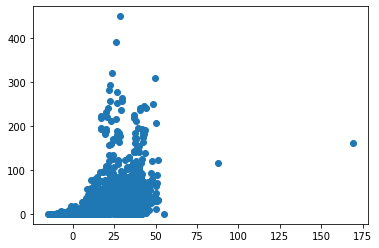

In [26]:
plt.scatter(reg.predict(x2),Y["lymphocyte"])
plt.show
stats.pearsonr(reg.predict(x2),Y["lymphocyte"])[0] 

In [28]:
r2_score(reg.predict(x2),Y["lymphocyte"])

-4.112574882104258

In [29]:
reg = make_pipeline(LinearRegression())
reg.fit(x2, Y["lymphocyte"])

Pipeline(memory=None,
         steps=[('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

0.40447147962754915

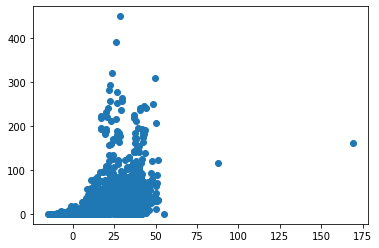

In [30]:
plt.scatter(reg.predict(x2),Y["lymphocyte"])
plt.show
stats.pearsonr(reg.predict(x2),Y["lymphocyte"])[0] 

In [391]:
r2_score(reg.predict(x2),Y["lymphocyte"])

-4.1042261409615755

In [31]:
regr = make_pipeline(StandardScaler(),LinearSVR(random_state=0, tol=1e-5))
regr.fit(x2, Y["lymphocyte"])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvr',
                 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=0, tol=1e-05,
                           verbose=0))],
         verbose=False)

0.3864483899835101

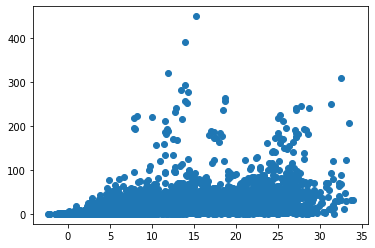

In [33]:
plt.scatter(regr.predict(x2),Y["lymphocyte"])
plt.show
stats.pearsonr(regr.predict(x2),Y["lymphocyte"])[0] 


In [41]:
fold_num1 = 1
fold_num2 = 2
fold_num3 = 3

x_train = []
x_val = []
x_test = []
#retrieve images that are in Fold 1 append them into list called x_train
for i in range(X.shape[0]):
    if F[i] == fold_num1:
        x_train.append(X[i])
x_train = np.array(x_train, dtype=np.uint8)
#retrieve images that are in Fold 2 append them into list called x_val
for i in range(X.shape[0]):
    if F[i] == fold_num2:
        x_val.append(X[i])
x_val = np.array(x_val, dtype=np.uint8)
#retrieve images that are in Fold 3 append them into list called x_test
for i in range(X.shape[0]):
    if F[i] == fold_num3:
        x_test.append(X[i])
x_test = np.array(x_test, dtype=np.uint8)

In [67]:
x_train3a = np.concatenate((x_train, x_val), axis=0) #concatenated Fold 1 and Fold 2 images together in that order
y_train3a = pd.concat([Fold1["lymphocyte"], Fold2["lymphocyte"]], ignore_index=True) #concatenated Fold 1 and Fold 2 no of T3 cells together in same order

train_images, test_images = x_train3a / 255.0, x_test / 255.0


In [69]:
x_train3a.shape

(3373, 256, 256, 3)

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.optimizers import SGD

In [71]:

model = Sequential()
model.add(Conv2D(16, 3, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 100)               6

In [74]:
history = model.fit(train_images, y_train3a, epochs=2, 
                    validation_data=(test_images, y_train3a))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Epoch 1/2
106/106 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1044

ValueError: Data cardinality is ambiguous:
  x sizes: 1608
  y sizes: 3373
Make sure all arrays contain the same number of samples.

In [468]:

trainX = trainX.reshape((trainX.shape[0], 256, 256, 1))
testX = testX.reshape((testX.shape[0], 256, 256, 1))
# convert from integers to floats
train_norm = train.astype('float32')
test_norm = test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0


NameError: name 'trainX' is not defined